# 숙명여자대학교 기계시스템학부 딥러닝 2025: Lab1
## (강사: 심주용)

* [Lab0: Colab & Pytorch Basic](#section1)
* [Lab1: Optimization and ANN](#section2)
  * [Optimization of Linear Regression](#section3)
  * [ANN Decision Boundary Visualization](#section4)
  * [Universal Approximation Theorem](#section5)
  * [ANN for MNIST](#section6)

<a name="section1"></a>
# Lab0: Colab & Pytorch Basic

In [ ]:
!head /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0


In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.1Gi       6.7Gi       1.0Mi       4.9Gi        11Gi
Swap:             0B          0B          0B


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   37G   71G  35% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
/dev/sda1        85G   65G   20G  77% /kaggle/input
tmpfs           6.4G  108K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


### Google Colab Setup: Google Drive
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [ ]:
# prompt: Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Pytorch Introduction

[PyTorch](https://pytorch.org/) is an open source machine learning framework. At its core, PyTorch provides a few key features:

- A multidimensional **Tensor** object, similar to [numpy](https://numpy.org/) but with GPU accelleration.
- An optimized **autograd** engine for automatically computing derivatives
- A clean, modular API for building and deploying **deep learning models**

We will use PyTorch for all programming assignments throughout the semester. This notebook will focus on the **Tensor API**, as it is the main part of PyTorch that we will use for the first few assignments.

You can find more information about PyTorch by following one of the [oficial tutorials](https://pytorch.org/tutorials/) or by [reading the documentation](https://pytorch.org/docs/stable/).

To use PyTorch, we first need to import the `torch` package.

We also check the version; the assignments in this course will use PyTorch verion 1.10.0, since this is the default version in Google Colab.

In [ ]:
import torch
print(torch.__version__)

2.6.0+cu124


## Pytorch Basic - Table of Contents
We are going to cover 4 and 6. If needed, please refer this tutorial:

1. Tensor Basics
-  Creating and accessing tensors
- Tensor constructors
- Data Types
2. Tensor Indexing
- Slice Indexing
- Integer tensor indexing
- Boolean tensor indexing
3. Reshaping operations
- View
- Swapping axes
- Contigous tensors
4. Tensor operations
- Elementwise operations
- Reduction operations
- Matrix operations
- Vectorization
5. Broadcating
6. Running on GPU

### Reduction operations

So far we've seen basic arithmetic operations on tensors that operate elementwise. We may sometimes want to perform operations that aggregate over part or all of a tensor, such as a summation; these are called **reduction** operations.

Like the elementwise operations above, most reduction operations are available both as functions in the `torch` module and as instance methods on `tensor` objects.

The simplest reduction operation is summation. We can use the [`.sum()`](https://pytorch.org/docs/stable/generated/torch.Tensor.sum.html) method (or eqivalently [`torch.sum`](https://pytorch.org/docs/stable/generated/torch.sum.html)) to reduce either an entire tensor, or to reduce along only one dimension of the tensor using the `dim` argument:

In [ ]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float32)
x.sum(axis=0)

tensor([5., 7., 9.])

Other useful reduction operations include [`mean`](https://pytorch.org/docs/stable/generated/torch.mean.html), [`min`](https://pytorch.org/docs/stable/generated/torch.min.html), and [`max`](https://pytorch.org/docs/stable/generated/torch.max.html). You can find a full list of all available reduction operations [in the documentation](https://pytorch.org/docs/stable/torch.html#reduction-ops).

Some reduction operations return more than one value; for example `min` returns both the minimum value over the specified dimension, as well as the index where the minimum value occurs:

In [ ]:
x = torch.tensor([[2, 4, 3, 5], [3, 3, 5, 2]], dtype=torch.float32)
print('Original tensor:')
print(x, x.shape)

# Finding the overall minimum only returns a single value
print('\nOverall minimum: ', x.min())

# Compute the minimum along each column; we get both the value and location:
# The minimum of the first column is 2, and it appears at index 0;
# the minimum of the second column is 3 and it appears at index 1; etc
col_min_vals, col_min_idxs = x.min(dim=0)
print('\nMinimum along each column:')
print('values:', col_min_vals)
print('idxs:', col_min_idxs)

Original tensor:
tensor([[2., 4., 3., 5.],
        [3., 3., 5., 2.]]) torch.Size([2, 4])

Overall minimum:  tensor(2.)

Minimum along each column:
values: tensor([2., 3., 3., 2.])
idxs: tensor([0, 1, 0, 1])


**Your turn**: Implement a code to set the minimum value along each row of a tensor to zero. You should use reduction and indexing operations, and you should not use any explicit loops.

Hint: [`clone`](https://pytorch.org/docs/stable/generated/torch.Tensor.clone.html), [`argmin`](https://pytorch.org/docs/stable/generated/torch.Tensor.argmin.html)

In [ ]:
x0 = torch.tensor([[10, 20, 30], [2, 5, 1]])
print('Here is x0:')
print(x0)

def zero_row_min(x):
    y = None
    return y

y0 = zero_row_min(x0)
print('Here is y0:')
print(y0)
expected = [[0, 20, 30], [2, 5, 0]]


Here is x0:
tensor([[10, 20, 30],
        [ 2,  5,  1]])
Here is y0:
None


### Matrix operations

Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. PyTorch provides a number of linear algebra functions that compute different types of vector and matrix products. The most commonly used are:

- [`torch.dot`](https://pytorch.org/docs/stable/generated/torch.dot.html): Computes inner product of vectors
- [`torch.mm`](https://pytorch.org/docs/stable/generated/torch.mm.html): Computes matrix-matrix products
- [`torch.mv`](https://pytorch.org/docs/stable/generated/torch.mv.html): Computes matrix-vector products
- [`torch.addmm`](https://pytorch.org/docs/stable/generated/torch.addmm.html) / [`torch.addmv`](https://pytorch.org/docs/stable/generated/torch.addmv.html): Computes matrix-matrix and matrix-vector multiplications plus a bias
- [`torch.bmm`](https://pytorch.org/docs/stable/generated/torch.bmm.html) / [`torch.baddmm`](https://pytorch.org/docs/stable/generated/torch.baddbmm.html): Batched versions of `torch.mm` and `torch.addmm`, respectively
- [`torch.matmul`](https://pytorch.org/docs/stable/generated/torch.matmul.html): General matrix product that performs different operations depending on the rank of the inputs. Confusingly, this is similar to `np.dot` in numpy.

You can find a full list of the available linear algebra operators [in the documentation](https://pytorch.org/docs/stable/torch.html#blas-and-lapack-operations).
All of these functions are also available as Tensor instance methods, e.g. [`Tensor.dot`](https://pytorch.org/docs/stable/generated/torch.Tensor.dot.html) instead of `torch.dot`.

Here is an example of using `torch.dot` to compute inner products. Like the other mathematical operators we've seen, most linear algebra operators are available both as functions in the `torch` module and as instance methods of tensors:

In [ ]:
torch.randn(2,3)

tensor([[ 0.9979,  1.6938,  2.0329],
        [-0.3573,  0.5285,  0.8887]])

In [ ]:
B, N, M, P = 2, 3, 5, 4
x = torch.randn(B, N, M)
y = torch.randn(B, M, P)
x.shape, y.shape

(torch.Size([2, 3, 5]), torch.Size([2, 5, 4]))

In [ ]:
def batched_matrix_multiply_loop(x,y):
    z = torch.zeros(x.shape[0], x.shape[1], y.shape[2])
    for i, (xi, yi) in enumerate(zip(x,y)):
      z[i] = torch.mm(xi,yi)
    return z

def batched_matrix_multiply_noloop(x,y):
    z = torch.bmm(x,y)
    return z

B, N, M, P = 2, 3, 5, 4
x = torch.randn(B, N, M)
y = torch.randn(B, M, P)
z_expected = torch.stack([x[0] @ y[0], x[1] @ y[1]])

z1 = batched_matrix_multiply_loop(x, y)
z2 = batched_matrix_multiply_noloop(x, y)
z1, z2, z_expected

(tensor([[[ 4.1314, -0.9967, -2.5363,  2.5697],
          [-0.5471, -2.1141, -1.5370, -0.2853],
          [-1.1362, -5.4949, -0.7621, -0.5885]],
 
         [[-0.4882, -0.9828, -0.6100,  3.1070],
          [-2.8333, -0.2567, -2.0161,  3.3873],
          [-0.5853, -1.1667,  2.0648, -1.6846]]]),
 tensor([[[ 4.1314, -0.9967, -2.5363,  2.5697],
          [-0.5471, -2.1141, -1.5370, -0.2853],
          [-1.1362, -5.4949, -0.7621, -0.5885]],
 
         [[-0.4882, -0.9828, -0.6100,  3.1070],
          [-2.8333, -0.2567, -2.0161,  3.3873],
          [-0.5853, -1.1667,  2.0648, -1.6846]]]),
 tensor([[[ 4.1314, -0.9967, -2.5363,  2.5697],
          [-0.5471, -2.1141, -1.5370, -0.2853],
          [-1.1362, -5.4949, -0.7621, -0.5885]],
 
         [[-0.4882, -0.9828, -0.6100,  3.1070],
          [-2.8333, -0.2567, -2.0161,  3.3873],
          [-0.5853, -1.1667,  2.0648, -1.6846]]]))

In [ ]:
def batched_matrix_multiply_loop(x,y):
    z = torch.zeros(x.shape[0], x.shape[1], y.shape[2])
    for i, (xi, yi) in enumerate(zip(x,y)):
      z[i] = torch.mm(xi,yi)
    return z

def batched_matrix_multiply_noloop(x,y):
    z = torch.bmm(x,y)
    return z

B, N, M, P = 2, 3, 5, 4
x = torch.randn(B, N, M)
y = torch.randn(B, M, P)
z_expected = torch.stack([x[0] @ y[0], x[1] @ y[1]])

z1 = batched_matrix_multiply_loop(x, y)
z2 = batched_matrix_multiply_noloop(x, y)
z1, z2, z_expected

(tensor([[[ 2.7758,  0.1319, -1.0618,  1.0290],
          [ 0.2477, -0.9766, -1.4088,  0.0800],
          [ 1.2295, -3.0038, -1.0355, -0.1734]],
 
         [[ 0.7379,  2.9394,  0.5514, -1.5638],
          [-0.1091,  0.2569,  3.3199,  1.8753],
          [ 1.8741,  5.0635,  3.9775, -4.0005]]]),
 tensor([[[ 2.7758,  0.1319, -1.0618,  1.0290],
          [ 0.2477, -0.9766, -1.4088,  0.0800],
          [ 1.2295, -3.0038, -1.0355, -0.1734]],
 
         [[ 0.7379,  2.9394,  0.5514, -1.5638],
          [-0.1091,  0.2569,  3.3199,  1.8753],
          [ 1.8741,  5.0635,  3.9775, -4.0005]]]),
 tensor([[[ 2.7758,  0.1319, -1.0618,  1.0290],
          [ 0.2477, -0.9766, -1.4088,  0.0800],
          [ 1.2295, -3.0038, -1.0355, -0.1734]],
 
         [[ 0.7379,  2.9394,  0.5514, -1.5638],
          [-0.1091,  0.2569,  3.3199,  1.8753],
          [ 1.8741,  5.0635,  3.9775, -4.0005]]]))

### Broadcasting
Broadcasting is a powerful mechanism that allows PyTorch to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller tensor and a larger tensor, and we want to use the smaller tensor multiple times to perform some operation on the larger tensor.

For example, suppose that we want to add a constant vector to each row of a tensor. We could do it like this:


In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = torch.zeros_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of v: {v.shape}")

print(y)

Shape of x: torch.Size([4, 3])
Shape of y: torch.Size([4, 3])
Shape of v: torch.Size([3])
tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


This works; however when the tensor x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the tensor x is equivalent to forming a tensor vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv. We could implement this approach like this:


In [ ]:
vv = v.repeat((4, 1))  # Stack 4 copies of v on top of each other
print(vv)              # Prints "[[1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]]"

tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])


In [ ]:
y = x + vv  # Add x and vv elementwise
print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of vv: {vv.shape}")

print(y)

Shape of x: torch.Size([4, 3])
Shape of y: torch.Size([4, 3])
Shape of vv: torch.Size([4, 3])
tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


The line y = x + v works even though x has shape (4, 3) and v has shape (3,) due to broadcasting; this line works as if v actually had shape (4, 3), where each row was a copy of v, and the sum was performed elementwise.

Broadcasting two tensors together follows these rules:

1.   If the tensors do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2.   The two tensors are said to be *compatible* in a dimension if they have the same size in the dimension, or if one of the tensors has size 1 in that dimension.
3.   The tensors can be broadcast together if they are compatible in all dimensions.
4.   After broadcasting, each tensor behaves as if it had shape equal to the elementwise maximum of shapes of the two input tensors.
5.   In any dimension where one tensor had size 1 and the other tensor had size greater than 1, the first tensor behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](https://pytorch.org/docs/stable/notes/broadcasting.html).

Broadcasting usually happens implicitly inside many PyTorch operators. However we can also broadcast explicitly using the function [`torch.broadcast_tensors`](https://pytorch.org/docs/stable/generated/torch.broadcast_tensors.html#torch.broadcast_tensors):

In [ ]:
y = x + v

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of v: {v.shape}")

print(y)

Shape of x: torch.Size([4, 3])
Shape of y: torch.Size([4, 3])
Shape of v: torch.Size([3])
tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


In [ ]:
vv = v.reshape((1,3))
y = x + vv

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of vv: {vv.shape}")

print(y)

Shape of x: torch.Size([4, 3])
Shape of y: torch.Size([4, 3])
Shape of vv: torch.Size([1, 3])
tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


In [ ]:
vv = v.reshape((3,1))
y = x + vv

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of vv: {vv.shape}")

print(y)

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
w = torch.tensor([4, 5])                  # w has shape (2,)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(w)

# x has shape (2, 3) and w has shape (2,). We reshape w to (2, 1);
# then when we add the two the result broadcasts to (2, 3):
print('\nAdd the vector to each column of the matrix:')
print(x + w.view(-1, 1))

# Another solution is the following:
# 1. Transpose x so it has shape (3, 2)
# 2. Since w has shape (2,), adding will broadcast to (3, 2)
# 3. Transpose the result, resulting in a shape (2, 3)
print((x.t() + w).t())

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([4, 5])

Add the vector to each column of the matrix:
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])


#### Multiply a tensor by a set of constants

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(c)

# We do the following:
# 1. Reshape c from (4,) to (4, 1, 1)
# 2. x has shape (2, 3). Since they have different ranks, when we multiply the
#    two, x behaves as if its shape were (1, 2, 3)
# 3. The result of the broadcast multiplication between tensor of shape
#    (4, 1, 1) and (1, 2, 3) has shape (4, 2, 3)
# 4. The result y has shape (4, 2, 3), and y[i] (shape (2, 3)) is equal to
#    c[i] * x
y = c.view(-1, 1, 1) * x
print('\nMultiply x by a set of constants:')
print(y)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([  1,  10,  11, 100])

Multiply x by a set of constants:
tensor([[[  1,   2,   3],
         [  4,   5,   6]],

        [[ 10,  20,  30],
         [ 40,  50,  60]],

        [[ 11,  22,  33],
         [ 44,  55,  66]],

        [[100, 200, 300],
         [400, 500, 600]]])


### Running on GPU

**Note: this section requires a GPU! If you do not have a computer with a CUDA-enabled GPU, you can complete this portion of the notebook on Google Colab.**

One of the most important features of PyTorch is that it can use graphics processing units (GPUs) to accelerate its tensor operations.

We can easily check whether PyTorch is configured to use GPUs:

Tensors can be moved onto any device using the .to method.

In [ ]:
import torch

torch.cuda.is_available()

True

In [ ]:
!pwd

/content


In [ ]:
!nvidia-smi

Mon Mar 17 08:04:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

You can enable GPUs in Colab via Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU.

This may cause the Colab runtime to restart, so we will re-import torch in the next cell.

We have already seen that PyTorch tensors have a `dtype` attribute specifying their datatype. All PyTorch tensors also have a `device` attribute that specifies the device where the tensor is stored -- either CPU, or CUDA (for NVIDA GPUs). A tensor on a CUDA device will automatically use that device to accelerate all of its operations.

Just as with datatypes, we can use the [`.to()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.to) method to change the device of a tensor. We can also use the convenience methods `.cuda()` and `.cpu()` methods to move tensors between CPU and GPU.

In [ ]:
# Construct a tensor on the CPU
x0 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print('x0 device:', x0.device)

# Move it to the GPU using .to()
x1 = x0.to('cuda')
print('x1 device:', x1.device)

x0 device: cpu
x1 device: cuda:0


<a name="section2"></a>
# Lab1: Optimization and ANN

<a name="section3"></a>
# Optimization of Linear Regression
## Mean Squared Error (MSE) Loss Function

$L = \frac{1}{N} \sum_{i=1}^{N} (y_{pred}^{(i)} - y^{(i)})^2$

Where $L$ is the loss function,
$N$ is the number of samples,
$y_{pred}^{(i)}$ is the predicted output for the $i^{th}$ sample,
$y^{(i)}$ is the actual output for the $i^{th}$ sample,
$w$ is the weight, and
$b$ is the bias.

## Gradients of the Loss Function

Gradient with respect to $w$:

$\frac{\partial L}{\partial w} = \frac{2}{N} \sum_{i=1}^{N} x^{(i)}(wx^{(i)} + b - y^{(i)})$

Gradient with respect to $b$:

$\frac{\partial L}{\partial b} = \frac{2}{N} \sum_{i=1}^{N} (wx^{(i)} + b - y^{(i)})$

## Gradient Update Equations
Update for $w$:
$w := w - \eta \frac{\partial L}{\partial w}$

Update for $b$:
$b := b - \eta \frac{\partial L}{\partial b}$

These update steps are iteratively applied over many epochs, aiming to minimize the loss function $L$ and converge to the optimal values of $w$ and $b$ for the best model fit.

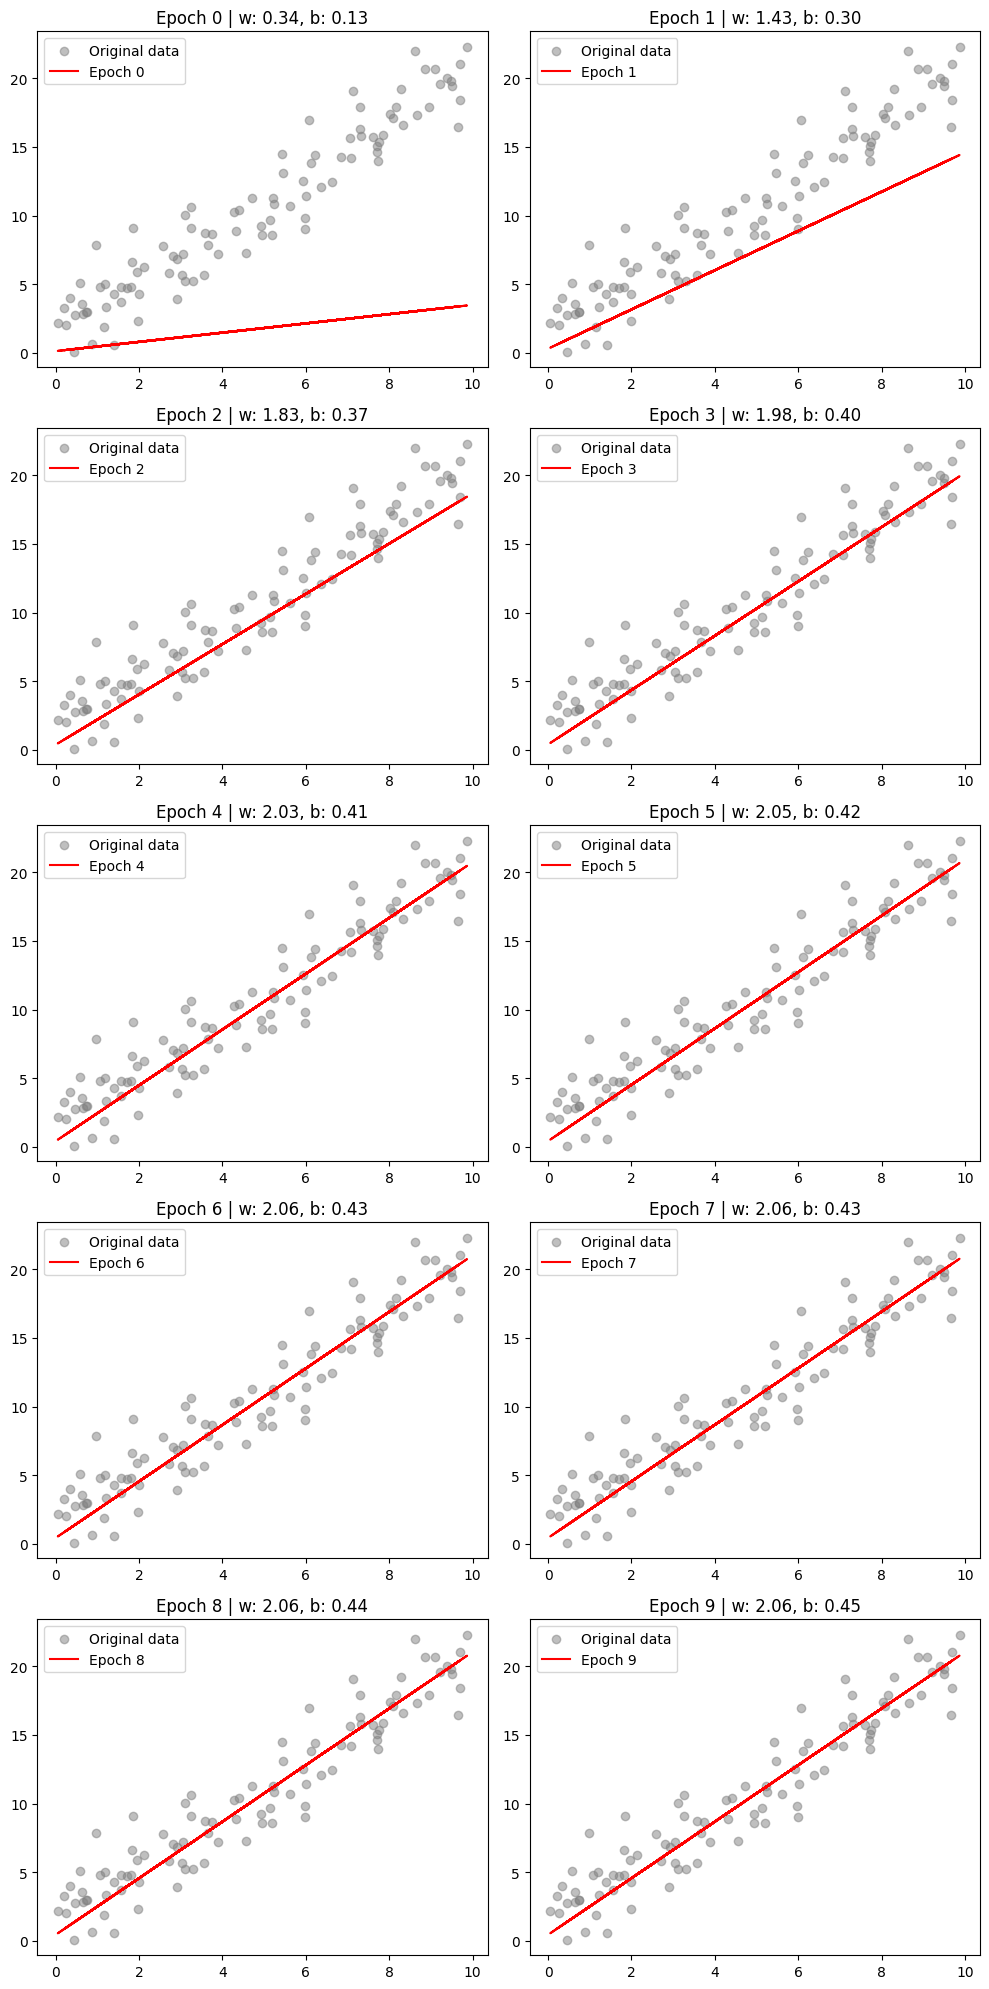

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
n_samples = 100
x = np.random.rand(n_samples, 1) * 10  # Features
y = 2 * x + 1 + np.random.randn(n_samples, 1) * 2  # Targets with noise

x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# Initialize weights and bias with random values
w = torch.randn(1, dtype=torch.float32, requires_grad=False)
b = torch.randn(1, dtype=torch.float32, requires_grad=False)

# Learning rate
lr = 0.01

# Number of epochs
epochs = 10

# Number of subplots needed
plt.figure(figsize=(10, 20))

for epoch in range(epochs):

    if (epoch+1) % 1 == 0:
        plt.subplot(5, 2, epoch+1)
        with torch.no_grad():
            predicted = w * x_train + b
            plt.scatter(x, y, label='Original data', color='grey', alpha=0.5)
            plt.plot(x, predicted.numpy(), label=f'Epoch {epoch}', color='red')
            plt.title(f'Epoch {epoch} | w: {w.item():.2f}, b: {b.item():.2f}')
            plt.legend()

    # Forward pass: Compute predicted y by the equation y = wx + b
    y_pred = w * x_train + b

    # Compute and print loss using mean squared error
    loss = ((y_pred - y_train) ** 2).mean()

    # Manually compute gradients for our parameters (w and b)
    grad_w = 2.0 * (y_pred - y_train) * x_train
    grad_w = grad_w.mean()

    grad_b = 2.0 * (y_pred - y_train)
    grad_b = grad_b.mean()

    # Update weights using gradient descent
    w -= lr * grad_w
    b -= lr * grad_b


plt.tight_layout()
plt.show()


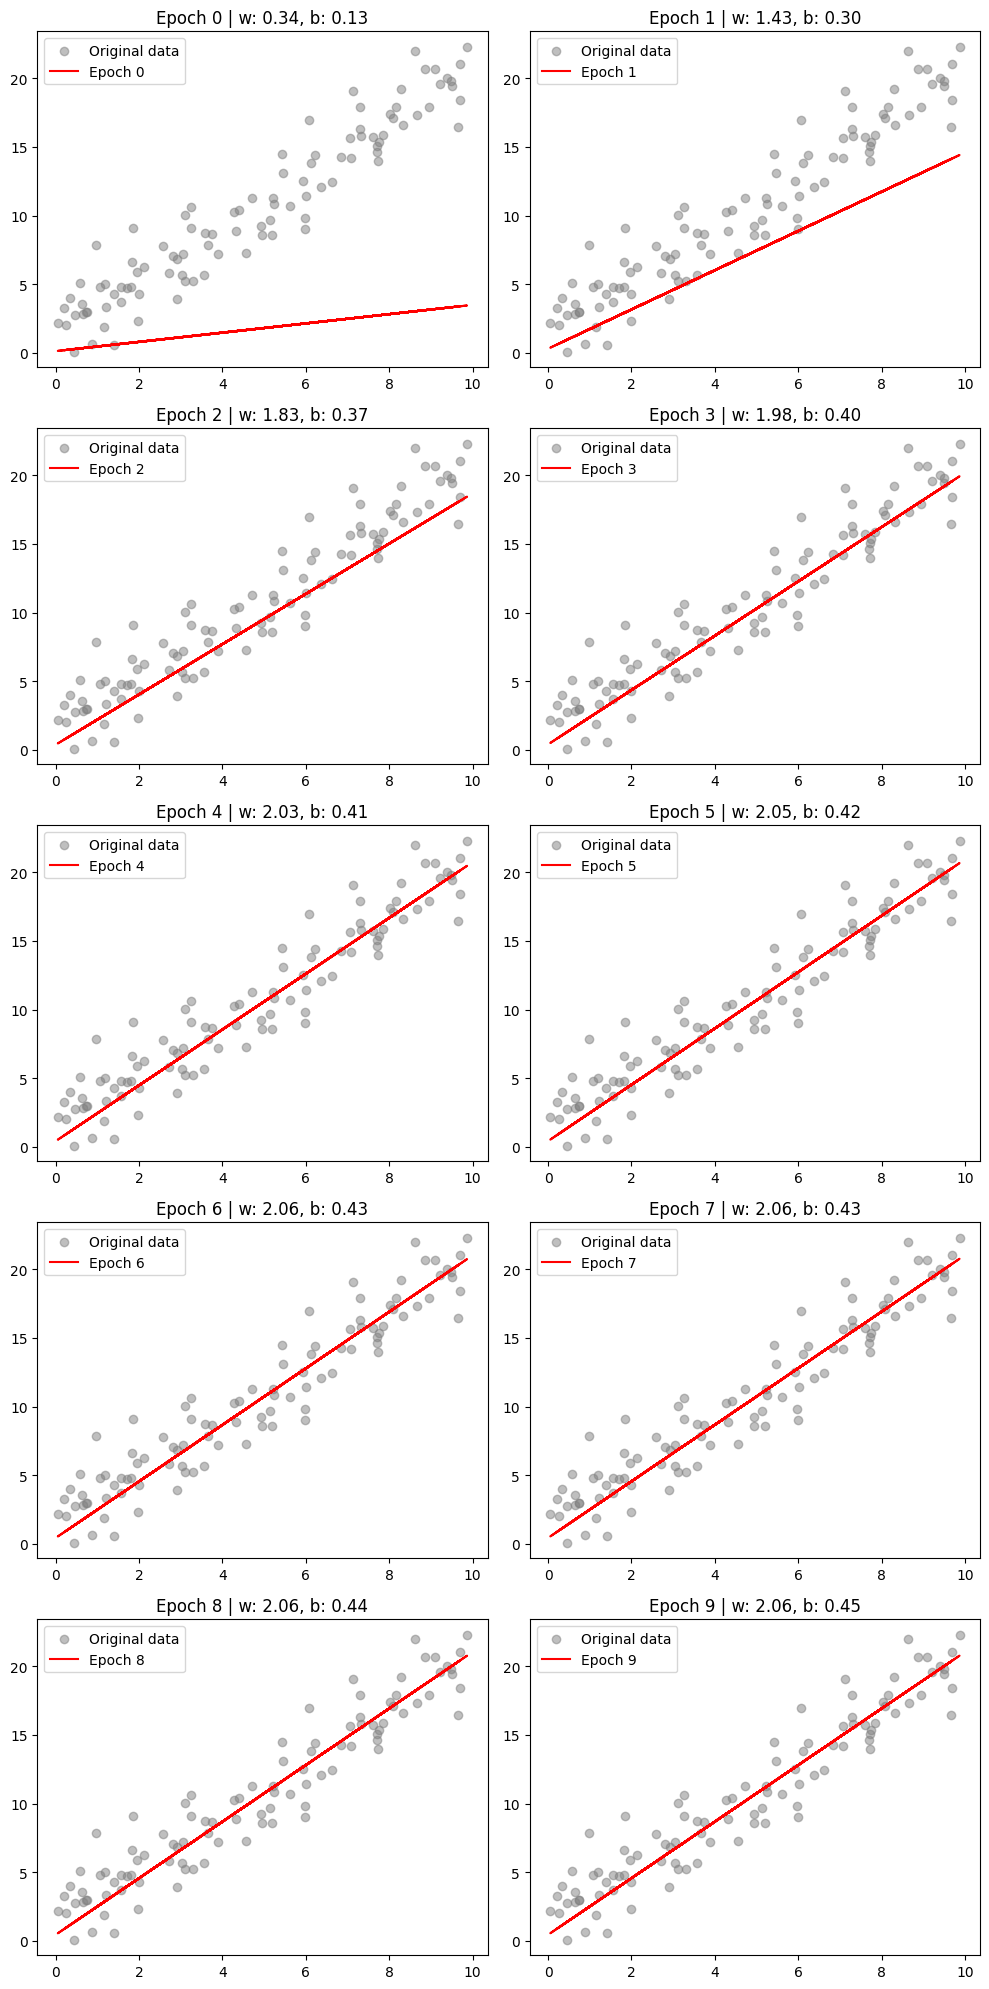

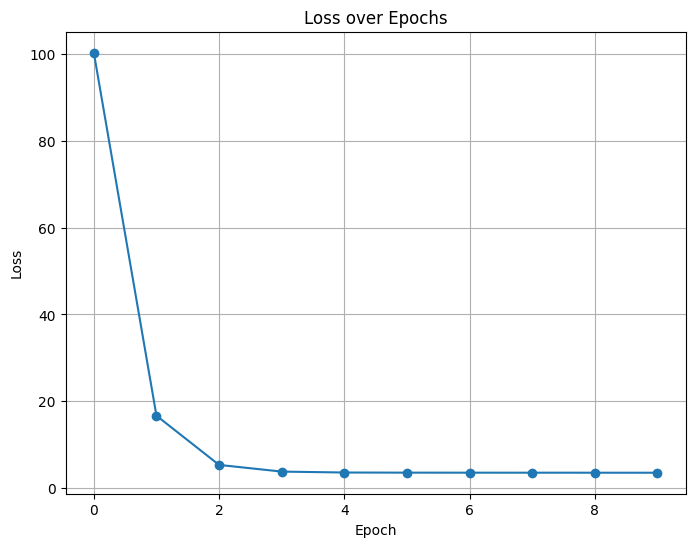

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
n_samples = 100
x = np.random.rand(n_samples, 1) * 10  # Features
y = 2 * x + 1 + np.random.randn(n_samples, 1) * 2  # Targets with noise

x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# Initialize weights and bias with random values
w = torch.randn(1, dtype=torch.float32, requires_grad=False)
b = torch.randn(1, dtype=torch.float32, requires_grad=False)

# Learning rate
lr = 0.01

# Number of epochs
epochs = 10

# Number of subplots needed
plt.figure(figsize=(10, 20))

losses = []

for epoch in range(epochs):

    if (epoch+1) % 1 == 0:
        plt.subplot(5, 2, epoch+1)
        with torch.no_grad():
            predicted = w * x_train + b
            plt.scatter(x, y, label='Original data', color='grey', alpha=0.5)
            plt.plot(x, predicted.numpy(), label=f'Epoch {epoch}', color='red')
            plt.title(f'Epoch {epoch} | w: {w.item():.2f}, b: {b.item():.2f}')
            plt.legend()

    # Forward pass: Compute predicted y by the equation y = wx + b
    y_pred = w * x_train + b

    # Compute and print loss using mean squared error
    loss = ((y_pred - y_train) ** 2).mean()

    losses.append(loss.item())

    # Manually compute gradients for our parameters (w and b)
    grad_w = 2.0 * (y_pred - y_train) * x_train
    grad_w = grad_w.mean()

    grad_b = 2.0 * (y_pred - y_train)
    grad_b = grad_b.mean()

    # Update weights using gradient descent
    w -= lr * grad_w
    b -= lr * grad_b

plt.tight_layout()
plt.show()

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), losses, '-o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.show()

In [ ]:
# prompt: Visualize the loss over epoch. Complete the whole code, so that I dont have to copy the above code.

import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Lists to store loss values for each epoch
losses = []

# ... (Your existing code) ...

for epoch in range(epochs):
    # ... (Your existing code) ...

    # Compute and print loss using mean squared error
    loss = ((y_pred - y_train) ** 2).mean()
    losses.append(loss.item()) # Store the loss value

    # ... (Your existing code) ...

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.show()


## Automatic Differentiation with PyTorch using .backward() fucntion
- Setting requires_grad=True for w and b to enable gradient tracking.

- Using .backward() to automatically compute gradients.

- Manually updating w and b within a torch.no_grad() context to prevent tracking these operations in the computation graph.

- Zeroing the gradients of w and b after each update to ensure gradients from previous epochs are not accumulated.

In [ ]:
# prompt: initialize w, b

# Initialize weights and bias with random values
w = torch.randn(1, dtype=torch.float32, requires_grad=True)
b = torch.randn(1, dtype=torch.float32, requires_grad=True)


In [ ]:
w.grad

tensor([0.])

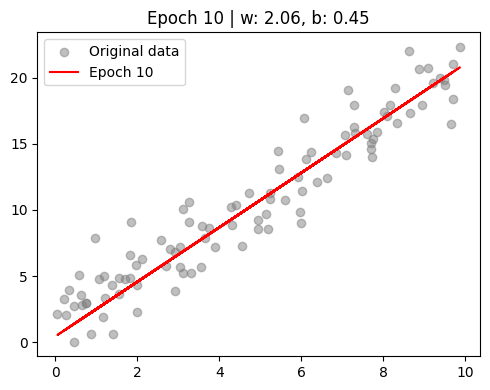

In [ ]:
# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Initialize weights and bias with random values and set requires_grad=True to enable gradient computation
w = torch.randn(1, dtype=torch.float32, requires_grad=True)
b = torch.randn(1, dtype=torch.float32, requires_grad=True)

lr = 0.01 # Learning rate
epochs = 10 # Number of epochs

for epoch in range(epochs):
    # Forward pass: Compute predicted y by the equation y = wx + b
    y_pred = w * x_train + b

    # Compute and print loss using mean squared error
    loss = ((y_pred - y_train) ** 2).mean()

    # Use backward to automatically compute gradients
    loss.backward()

    # Update weights using gradient descent. Wrap in torch.no_grad() because weights have requires_grad=True, but we don't need to track this in autograd.
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # Zero the gradients after updating
    w.grad.zero_()
    b.grad.zero_()


plt.figure(figsize=(5, 4))
with torch.no_grad():
    predicted = w * x_train + b
    plt.scatter(x, y, label='Original data', color='grey', alpha=0.5)
    plt.plot(x, predicted.numpy(), label=f'Epoch {epoch+1}', color='red')
    plt.title(f'Epoch {epoch+1} | w: {w.item():.2f}, b: {b.item():.2f}')
    plt.legend()
plt.tight_layout()
plt.show()


## PyTorch Optimizer
- Defining the model parameters (w and b) that the optimizer will update.
- Initializing the optimizer (torch.optim.SGD) with these parameters and the learning rate.
- Using optimizer.zero_grad() to clear the gradients before the backward pass.
- Replacing the manual update of w and b with optimizer.step(), which automatically applies the gradients.

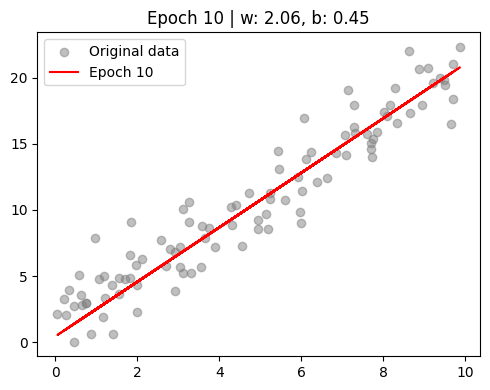

In [ ]:
# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Initialize weights and bias with random values and set requires_grad=True to enable gradient computation
w = torch.randn(1, dtype=torch.float32, requires_grad=True)
b = torch.randn(1, dtype=torch.float32, requires_grad=True)

lr = 0.01 # Learning rate
epochs = 10 # Number of epochs

# Create the optimizer
optimizer = torch.optim.SGD([w, b], lr=lr)

for epoch in range(epochs):
    # necessary since PyTorch accumulates gradients
    optimizer.zero_grad()

    y_pred = w * x_train + b

    # Compute and print loss using mean squared error
    loss = ((y_pred - y_train) ** 2).mean()

    loss.backward()

    # Perform a single optimization step (parameter update)
    optimizer.step()

plt.figure(figsize=(5, 4))
with torch.no_grad():
    predicted = w * x_train + b
    plt.scatter(x, y, label='Original data', color='grey', alpha=0.5)
    plt.plot(x, predicted.numpy(), label=f'Epoch {epoch+1}', color='red')
    plt.title(f'Epoch {epoch+1} | w: {w.item():.2f}, b: {b.item():.2f}')
    plt.legend()
plt.tight_layout()
plt.show()

## PyTorch Loss Function
- Use torch.nn.functional.mse_loss.
- This change simplifies the loss computation step, as you no longer need to manually define the MSE loss.

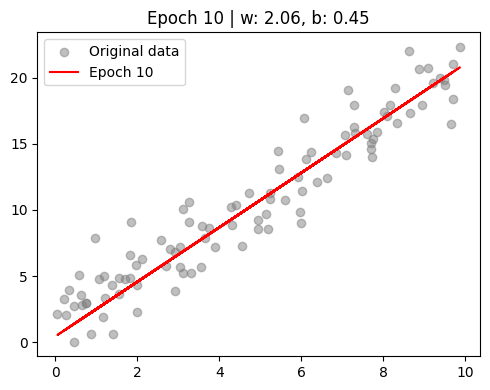

In [ ]:
# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

import torch.nn.functional as F

w = torch.randn(1, dtype=torch.float32, requires_grad=True)
b = torch.randn(1, dtype=torch.float32, requires_grad=True)

lr = 0.01 # Learning rate
epochs = 10 # Number of epochs

# Define the optimizer
optimizer = torch.optim.SGD([w, b], lr=lr)

for epoch in range(epochs):
    optimizer.zero_grad() # Zero the gradients
    # Forward pass: Compute predicted y by the equation y = wx + b
    y_pred = w * x_train + b
    # Compute loss using PyTorch's MSE loss function
    loss = F.mse_loss(y_pred, y_train)
    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()
    # Perform a single optimization step (parameter update)
    optimizer.step()

plt.figure(figsize=(5, 4))
with torch.no_grad():
    predicted = w * x_train + b
    plt.scatter(x, y, label='Original data', color='grey', alpha=0.5)
    plt.plot(x, predicted.numpy(), label=f'Epoch {epoch+1}', color='red')
    plt.title(f'Epoch {epoch+1} | w: {w.item():.2f}, b: {b.item():.2f}')
    plt.legend()
plt.tight_layout()
plt.show()


<a name="section4"></a>
# ANN Decision Boundary Visualization

- Let's use synthetic data for binary classification



### Data Generation:
The script starts by generating 1000 samples of two features, x1 and x2, using uniform random distributions. The range for x1 is set from -5 to 5, while for x2, it's from -4 to 4.
A decision function g is defined to categorize these samples into two classes, C1 and C0, based on whether their value is above or below 0, respectively.

The samples are then separated into two groups (X1 for C1 and X0 for C0) based on their class.
The input features (train_X) and labels (train_y) for the neural network are prepared by stacking the two groups' features and creating a binary label array, where C1 is labeled 1 and C0 is labeled 0.
A scatter plot visualizes the distribution of the two classes in the feature space.


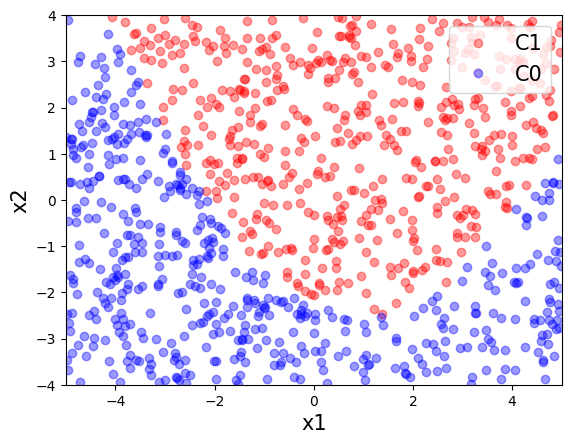

In [ ]:
# training data gerneration
import numpy as np
import matplotlib.pyplot as plt

m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1-1)**2 + 2*x2 + 5

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.array(train_X)
train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

plt.figure()
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'x1', fontsize = 15)
plt.ylabel(r'x2', fontsize = 15)
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()


### Model Definition:
A simple feedforward neural network with two linear layers separated by a sigmoid activation function is defined using PyTorch's Sequential API. The network takes two features as input and outputs a single value passed through a sigmoid function to represent the probability of belonging to class C1.
The Adam optimizer and binary cross-entropy loss function are set up for training the model.

### Training:
The input data and labels are converted to PyTorch tensors.
The model is trained in a loop for 100 epochs, printing the loss at each epoch.


## Sigmoid Activation

In [ ]:
# prompt: can we see the model's weight?

# Assuming you have a PyTorch model named 'model'
for name, param in model.named_parameters():
  print(f"Parameter name: {name}")
  print(f"Parameter shape: {param.shape}")
  print(f"Parameter data:\n{param.data}")
  print("-" * 20)


Parameter name: 0.weight
Parameter shape: torch.Size([2, 2])
Parameter data:
tensor([[ 3.2384,  2.0432],
        [-1.1725,  2.0099]])
--------------------
Parameter name: 0.bias
Parameter shape: torch.Size([2])
Parameter data:
tensor([5.9750, 5.2194])
--------------------
Parameter name: 2.weight
Parameter shape: torch.Size([1, 2])
Parameter data:
tensor([[4.9869, 4.1731]])
--------------------
Parameter name: 2.bias
Parameter shape: torch.Size([1])
Parameter data:
tensor([-6.2484])
--------------------


In [ ]:
ll = nn.Linear(in_features=2, out_features=3)
ll.weight

Parameter containing:
tensor([[-0.3779,  0.0466],
        [ 0.4474, -0.6374],
        [-0.1663, -0.1206]], requires_grad=True)

In [ ]:
model

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
model[0]

Linear(in_features=2, out_features=2, bias=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model using Sequential
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1),
    nn.Sigmoid()
)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Define the loss function
loss_function = nn.BCELoss()

# Assuming train_X and train_y are your data tensors and are of appropriate type and shape
# Convert datasets to tensor if not already, and ensure they are floats for the inputs and floats for the labels (for BCELoss)
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.FloatTensor(train_y).view(-1, 1)  # Ensuring the target tensor has the correct shape

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    output = model(train_X_tensor)
    loss = loss_function(output, train_y_tensor)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.7164696455001831
Epoch 2, Loss: 0.7027243971824646
Epoch 3, Loss: 0.687111496925354
Epoch 4, Loss: 0.6735202074050903
Epoch 5, Loss: 0.6616619825363159
Epoch 6, Loss: 0.6490224003791809
Epoch 7, Loss: 0.6343160271644592
Epoch 8, Loss: 0.6176337003707886
Epoch 9, Loss: 0.5992662906646729
Epoch 10, Loss: 0.5794414281845093
Epoch 11, Loss: 0.5585739612579346
Epoch 12, Loss: 0.5376189947128296
Epoch 13, Loss: 0.5177603363990784
Epoch 14, Loss: 0.4996529519557953
Epoch 15, Loss: 0.4831899404525757
Epoch 16, Loss: 0.46801045536994934
Epoch 17, Loss: 0.4539584517478943
Epoch 18, Loss: 0.44108638167381287
Epoch 19, Loss: 0.42951998114585876
Epoch 20, Loss: 0.4193764925003052
Epoch 21, Loss: 0.4107264280319214
Epoch 22, Loss: 0.4035709500312805
Epoch 23, Loss: 0.3978281319141388
Epoch 24, Loss: 0.3933377265930176
Epoch 25, Loss: 0.3898887038230896
Epoch 26, Loss: 0.3872590661048889
Epoch 27, Loss: 0.38524696230888367
Epoch 28, Loss: 0.3836776912212372
Epoch 29, Loss: 0.38238868

### Visualization of Model's Internal Representations and Decision Boundary:
The trained model's weights and biases are extracted to compute the activations and logits manually for the input data.
Two subplots visualize the logits and activations (after applying the sigmoid function) of the training data, colored by class. These plots help understand how the model is transforming the input data internally.
A line representing the model's decision boundary in the space of activations is computed and plotted. The boundary separates the two classes based on the model's learned weights and biases.

Overall, this code demonstrates not only how to train a simple neural network for a binary classification task using PyTorch but also offers insights into the model's internal transformations and decision-making process through visualization.

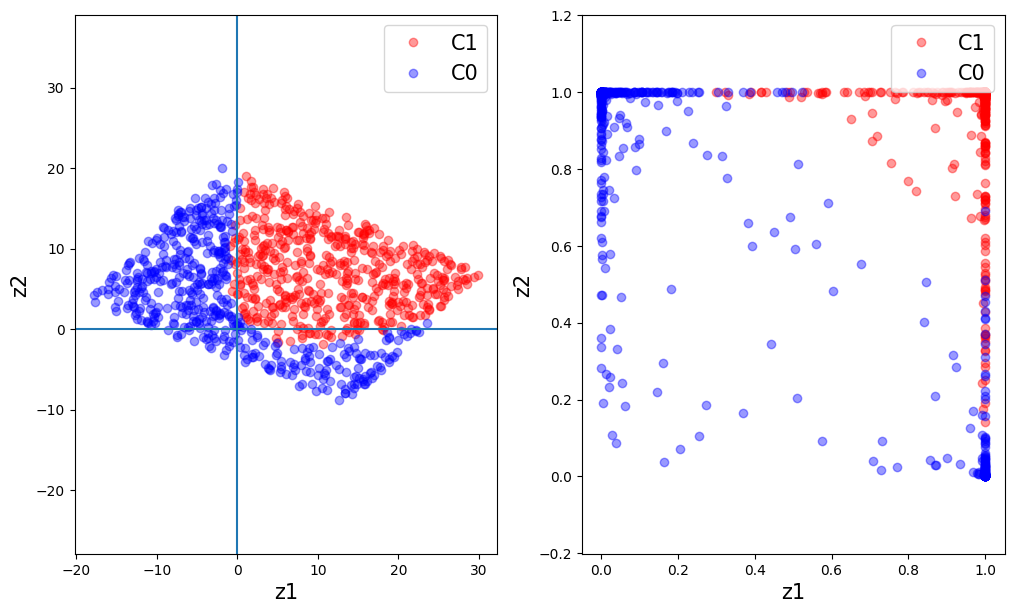

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming model is your trained PyTorch model and train_X is your input tensor

# Extracting weights and biases from the PyTorch model
w1, b1 = model[0].weight.data.numpy(), model[0].bias.data.numpy()
w2, b2 = model[2].weight.data.numpy(), model[2].bias.data.numpy()

# Converting train_X to a numpy array for matrix operations
X = train_X

# Calculating logits manually
logits = np.dot(X, w1.T) + b1

# Applying the sigmoid function to logits
H = 1 / (1 + np.exp(-logits))

# Plotting
plt.figure(figsize=(12, 7))

plt.subplot(121)
plt.plot(logits[:N, 0], logits[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(logits[N:m, 0], logits[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')
plt.axhline(0)
plt.axvline(0)

plt.subplot(122)
plt.plot(H[:N, 0], H[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(H[N:m, 0], H[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')
plt.show()

### Visualization of final output layer as a linear line

In [ ]:
w2, w2.shape

(array([[5.552127 , 4.5305157]], dtype=float32), (1, 2))

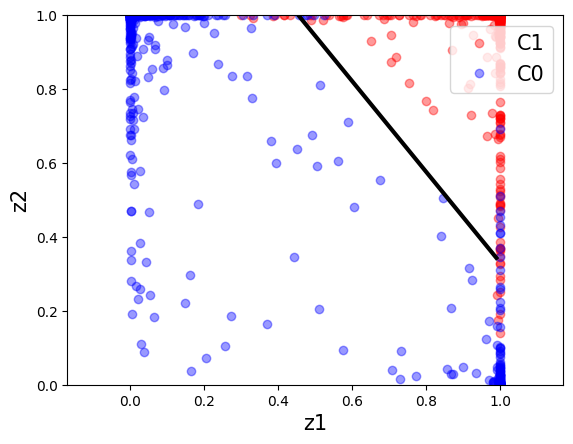

In [ ]:
x1p = np.arange(0, 1, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[0,1]*x1p - b2[0]/w2[0,1]

plt.figure()
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.xlabel('z1', fontsize = 15)
plt.ylabel('z2', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


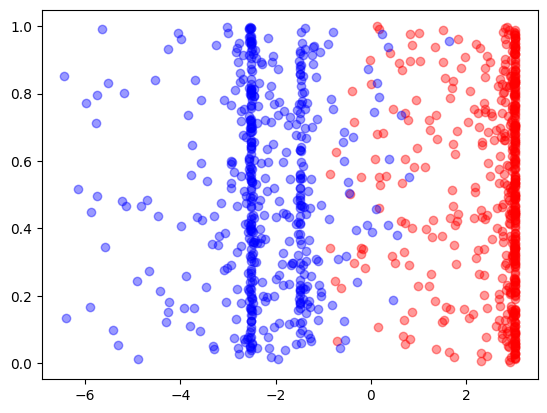

In [ ]:
z = w2[0,0]*H[:,0] + w2[0,1]*H[:,1] + b2[0]

plt.figure()
plt.plot(z[0:N], np.random.rand(N), 'ro', alpha = 0.4, label = 'C1')
plt.plot(z[N:m], np.random.rand(m-N), 'bo', alpha = 0.4, label = 'C0')
# plt.ylim([-10,10])
plt.show()

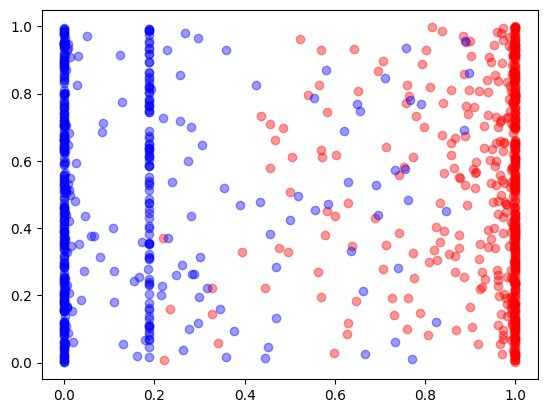

In [ ]:
s = 1 / (1 + np.exp(-z))

plt.figure()
plt.plot(s[0:N], np.random.rand(N), 'ro', alpha = 0.4, label = 'C1')
plt.plot(s[N:m], np.random.rand(m-N), 'bo', alpha = 0.4, label = 'C0')
# plt.ylim([-10,10])
plt.show()

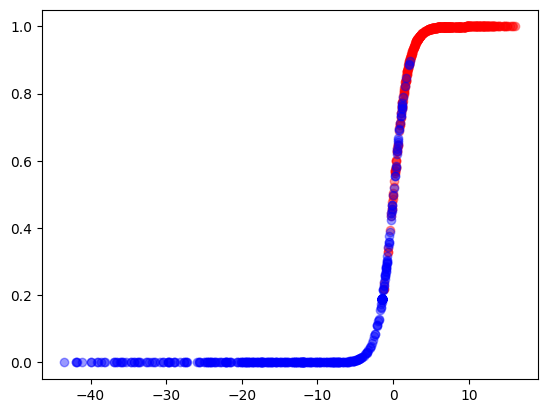

In [ ]:
s = 1 / (1 + np.exp(-z))

plt.figure()
plt.plot(z[0:N], s[0:N], 'ro', alpha = 0.4, label = 'C1')
plt.plot(z[N:m], s[N:m], 'bo', alpha = 0.4, label = 'C0')
# plt.ylim([-10,10])
plt.show()

## ReLU Activation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model using Sequential
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=2),
    nn.ReLU(),
    nn.Linear(in_features=2, out_features=1),
    nn.Sigmoid()
)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Define the loss function
loss_function = nn.BCELoss()

# Assuming train_X and train_y are your data tensors and are of appropriate type and shape
# Convert datasets to tensor if not already, and ensure they are floats for the inputs and floats for the labels (for BCELoss)
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.FloatTensor(train_y).view(-1, 1)  # Ensuring the target tensor has the correct shape

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    output = model(train_X_tensor)
    loss = loss_function(output, train_y_tensor)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.8571538329124451
Epoch 2, Loss: 0.7394863367080688
Epoch 3, Loss: 0.6674386858940125
Epoch 4, Loss: 0.6212587356567383
Epoch 5, Loss: 0.5865102410316467
Epoch 6, Loss: 0.5561931133270264
Epoch 7, Loss: 0.5274236798286438
Epoch 8, Loss: 0.5025070905685425
Epoch 9, Loss: 0.48218825459480286
Epoch 10, Loss: 0.4655253291130066
Epoch 11, Loss: 0.4515743851661682
Epoch 12, Loss: 0.43936100602149963
Epoch 13, Loss: 0.4273519515991211
Epoch 14, Loss: 0.41524800658226013
Epoch 15, Loss: 0.4028944969177246
Epoch 16, Loss: 0.39009571075439453
Epoch 17, Loss: 0.3771165907382965
Epoch 18, Loss: 0.36347827315330505
Epoch 19, Loss: 0.347637414932251
Epoch 20, Loss: 0.3302477300167084
Epoch 21, Loss: 0.31074175238609314
Epoch 22, Loss: 0.28952556848526
Epoch 23, Loss: 0.26763635873794556
Epoch 24, Loss: 0.2472781240940094
Epoch 25, Loss: 0.2295648604631424
Epoch 26, Loss: 0.21526922285556793
Epoch 27, Loss: 0.20437967777252197
Epoch 28, Loss: 0.1958305388689041
Epoch 29, Loss: 0.18829

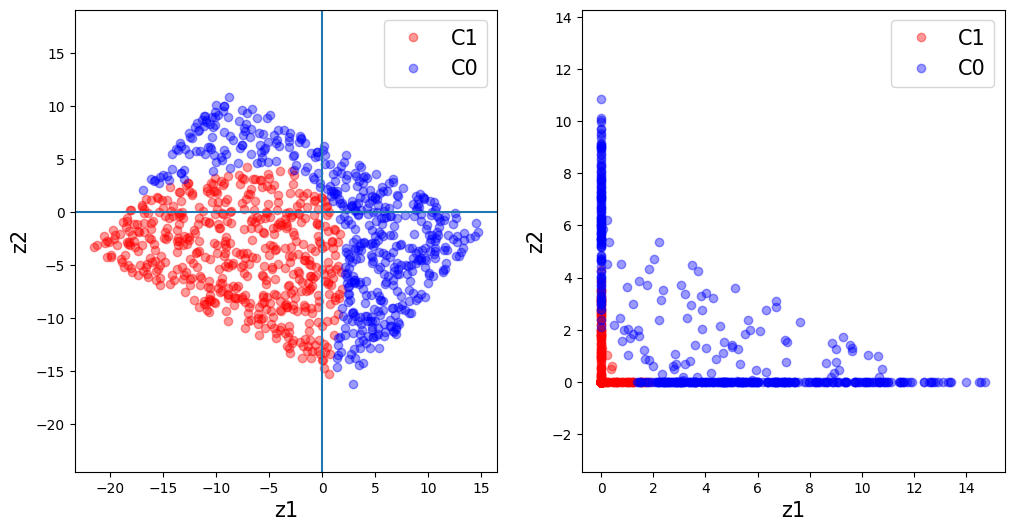

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming model is your trained PyTorch model and train_X is your input tensor

# Extracting weights and biases from the PyTorch model
w1, b1 = model[0].weight.data.numpy(), model[0].bias.data.numpy()
w2, b2 = model[2].weight.data.numpy(), model[2].bias.data.numpy()

# Converting train_X to a numpy array for matrix operations
X = train_X

# Calculating logits manually
logits = np.dot(X, w1.T) + b1

# Applying the sigmoid function to logits
H = np.maximum(0, logits)  # ReLU operation

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(logits[:N, 0], logits[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(logits[N:m, 0], logits[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')
plt.axhline(0)
plt.axvline(0)

plt.subplot(122)
plt.plot(H[:N, 0], H[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(H[N:m, 0], H[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')

plt.show()


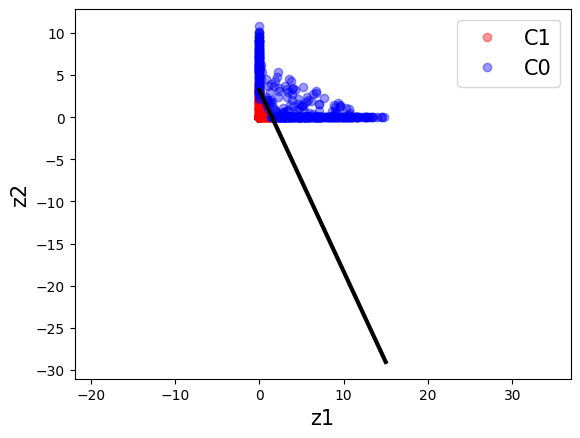

In [ ]:
x1p = np.arange(0, 15, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[0,1]*x1p - b2[0]/w2[0,1]

plt.figure()
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.xlabel('z1', fontsize = 15)
plt.ylabel('z2', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.show()


<a name="section6"></a>
# ANN for MNIST

Write a pytorch code to train a two layer multi layer perceptron with 100 hidden neurons and ReLU activation for the MNIST dataset. The output layer undergoes softmax. Train and compare the model in the two ways using cross entropy loss or SVM loss.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

# Loading the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define the MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)  # First layer (input to hidden)
        self.fc2 = nn.Linear(100, 10)     # Second layer (hidden to output)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # ReLU activation function
        x = self.fc2(x)  # No activation, output raw scores
        return x

# Train and Evaluate the Model Function
def train_and_evaluate_model(model, loss_fn, optimizer, train_loader, test_loader):
    # Training loop
    model.train()
    for epoch in range(10):  # Run for 10 epochs
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

    # Evaluation loop
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'Accuracy: {accuracy}%')

# Training with Cross Entropy Loss
print("Training with Cross Entropy Loss:")
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
cross_entropy_loss = nn.CrossEntropyLoss()
train_and_evaluate_model(model, cross_entropy_loss, optimizer, train_loader, test_loader)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.98MB/s]


Training with Cross Entropy Loss:
Epoch 1, Loss: 0.0583820715546608
Epoch 2, Loss: 0.042071446776390076
Epoch 3, Loss: 0.12713918089866638
Epoch 4, Loss: 0.010416902601718903
Epoch 5, Loss: 0.02248566225171089
Epoch 6, Loss: 0.12413885444402695
Epoch 7, Loss: 0.007450819481164217
Epoch 8, Loss: 0.006460400298237801
Epoch 9, Loss: 0.001836142037063837
Epoch 10, Loss: 0.026009270921349525
Accuracy: 97.67%


## Visualize the above model's results

Training with Cross Entropy Loss:
Epoch 1, Loss: 0.2824
Epoch 1, Accuracy: 95.85%
Epoch 2, Loss: 0.1221
Epoch 2, Accuracy: 96.74%
Epoch 3, Loss: 0.0856
Epoch 3, Accuracy: 97.35%
Epoch 4, Loss: 0.0650
Epoch 4, Accuracy: 97.43%
Epoch 5, Loss: 0.0530
Epoch 5, Accuracy: 97.66%
Epoch 6, Loss: 0.0420
Epoch 6, Accuracy: 97.70%
Epoch 7, Loss: 0.0364
Epoch 7, Accuracy: 97.55%
Epoch 8, Loss: 0.0296
Epoch 8, Accuracy: 97.67%
Epoch 9, Loss: 0.0238
Epoch 9, Accuracy: 97.73%
Epoch 10, Loss: 0.0203
Epoch 10, Accuracy: 97.84%


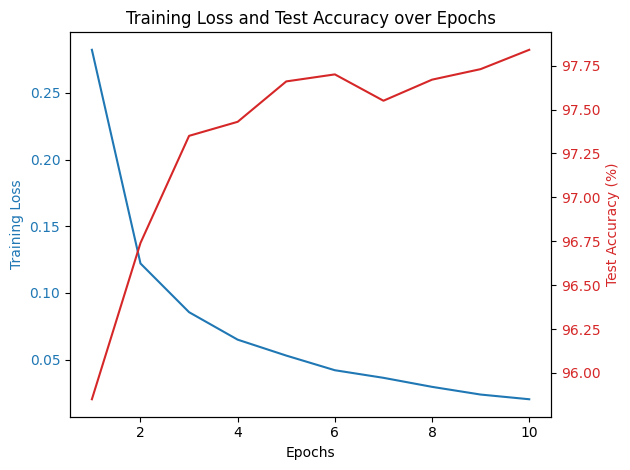

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

# Loading the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define the MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)  # First layer (input to hidden)
        self.fc2 = nn.Linear(100, 10)     # Second layer (hidden to output)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # ReLU activation function
        x = self.fc2(x)  # No activation, output raw scores
        return x

# Train and Evaluate the Model Function
def train_and_evaluate_model(model, loss_fn, optimizer, train_loader, test_loader):
    train_losses = []
    test_accuracies = []

    # Training loop
    model.train()
    for epoch in range(10):  # Run for 10 epochs
        epoch_loss = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')

        # Evaluation loop
        model.eval()
        correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = 100. * correct / len(test_loader.dataset)
        test_accuracies.append(accuracy)
        print(f'Epoch {epoch+1}, Accuracy: {accuracy:.2f}%')

    return train_losses, test_accuracies

# Training with Cross Entropy Loss
print("Training with Cross Entropy Loss:")
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
cross_entropy_loss = nn.CrossEntropyLoss()

# Run training and evaluation
train_losses, test_accuracies = train_and_evaluate_model(model, cross_entropy_loss, optimizer, train_loader, test_loader)

## Visualize the learning curve

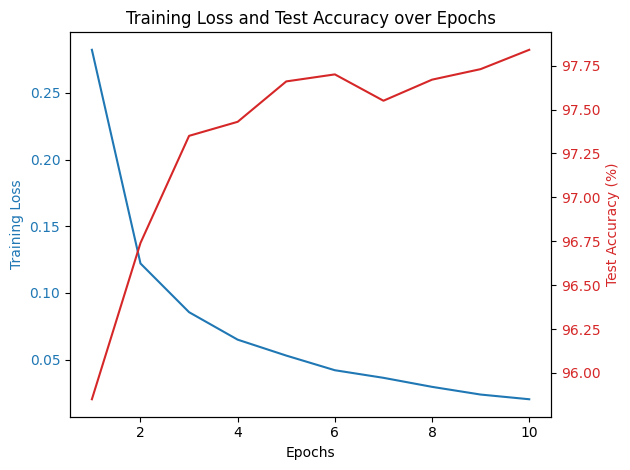

In [ ]:
# Plot training loss and test accuracy
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Loss', color='tab:blue')
ax1.plot(range(1, 11), train_losses, label="Training Loss", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Test Accuracy (%)', color='tab:red')
ax2.plot(range(1, 11), test_accuracies, label="Test Accuracy", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Training Loss and Test Accuracy over Epochs")
fig.tight_layout()
plt.show()


## Show the test images and gt and prediction


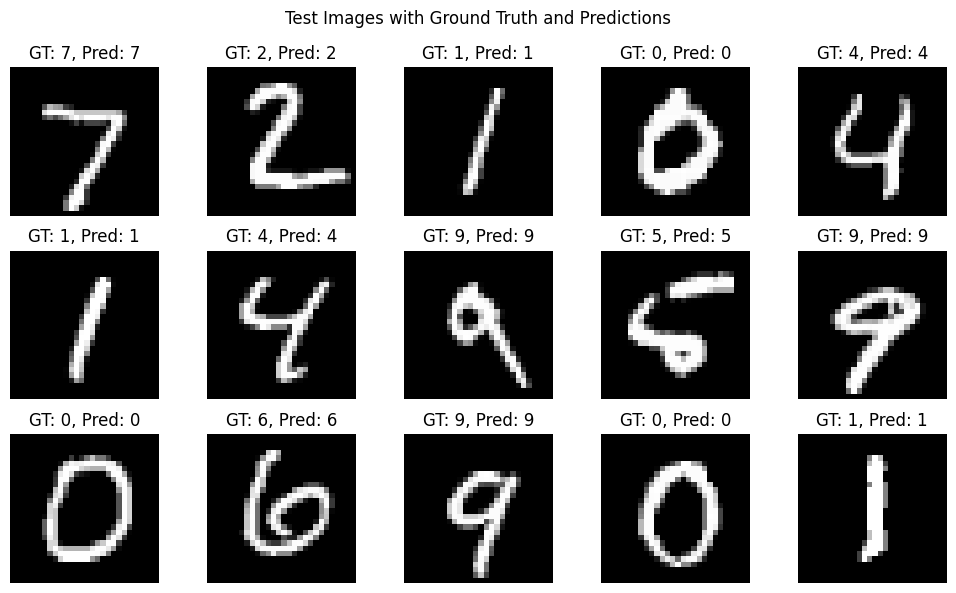

In [ ]:
import torch
import matplotlib.pyplot as plt

# Load the trained model and set it to evaluation mode
model.eval()

# Get a batch of test images and labels
test_images, test_labels = next(iter(test_loader))

# Make predictions
with torch.no_grad():
    outputs = model(test_images)
    predictions = outputs.argmax(dim=1)

# Display a few test images with their ground truth and predicted labels
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
fig.suptitle("Test Images with Ground Truth and Predictions")

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i].squeeze(), cmap="gray")
    ax.set_title(f"GT: {test_labels[i].item()}, Pred: {predictions[i].item()}")
    ax.axis("off")

plt.tight_layout()
plt.show()


## Implement the hinge loss with margin of 1 using pytorch

To implement the multi-class hinge loss (also known as SVM Loss) with a margin of 1 in PyTorch, you need to follow the mathematical formula for multi-class hinge loss. The basic idea behind the hinge loss for a single prediction is:

$ L_i = \sum_{j \neq y_i} \max(0, s_j - s_{y_i} + \text{margin}) $

where
$L_i$  is the loss for the i-th example, $s_j$ is the score for class $j$, $s_{y_i}$ is the score for the correct class $y_i$ , and "margin" is typically set to 1.

For a batch of predictions, the loss can be averaged over all examples in the batch.

In [ ]:
class MultiClassHingeLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(MultiClassHingeLoss, self).__init__()
        self.margin = margin

    def forward(self, output, target):
        """
        Args:
            output (Tensor): Predictions from the model (batch_size x num_classes).
            target (Tensor): True labels (batch_size).
        """
        # Number of classes
        num_classes = output.size(1)

        # Create a mask to ignore the contribution of the correct class
        correct_indices = target.unsqueeze(1).long()
        correct_scores = output.gather(1, correct_indices).expand_as(output)

        # Calculate the margin loss
        margin_loss = output - correct_scores + self.margin

        # Zero the loss for the correct class
        margin_loss.scatter_(1, correct_indices, 0)

        # ReLU activation (max(0, x))
        relu_applied = torch.relu(margin_loss)

        # Sum over classes, and then average over batch
        loss = torch.sum(relu_applied) / output.size(0)
        return loss

# Using the custom SVM Loss for training
svm_loss_fn = MultiClassHingeLoss(margin=1.0)
model = MLP()  # Ensure you're using the same MLP class defined earlier
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_and_evaluate_model(model, svm_loss_fn, optimizer, train_loader, test_loader)


Epoch 1, Loss: 0.3337
Epoch 1, Accuracy: 95.66%
Epoch 2, Loss: 0.1245
Epoch 2, Accuracy: 96.09%
Epoch 3, Loss: 0.0857
Epoch 3, Accuracy: 96.80%
Epoch 4, Loss: 0.0640
Epoch 4, Accuracy: 97.06%
Epoch 5, Loss: 0.0491
Epoch 5, Accuracy: 97.36%
Epoch 6, Loss: 0.0380
Epoch 6, Accuracy: 97.36%
Epoch 7, Loss: 0.0314
Epoch 7, Accuracy: 97.54%
Epoch 8, Loss: 0.0268
Epoch 8, Accuracy: 97.37%
Epoch 9, Loss: 0.0214
Epoch 9, Accuracy: 97.68%
Epoch 10, Loss: 0.0183
Epoch 10, Accuracy: 97.66%


([0.33371558663413436,
  0.12446578031878418,
  0.08566474549369073,
  0.06397761306318361,
  0.04914281638001582,
  0.037984745953279705,
  0.03136235497582124,
  0.026790356591169132,
  0.0214042325438594,
  0.01830780589536055],
 [95.66, 96.09, 96.8, 97.06, 97.36, 97.36, 97.54, 97.37, 97.68, 97.66])